Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [16]:
!pip install requests pandas yfinance plotly nbformat bs4

In [17]:
tesla = yf.Ticker("TSLA")

In [18]:
tesla_stock_data = tesla.history(period="max")

In [19]:
tesla_stock_data.reset_index(inplace=True)
tesla_stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [20]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0"
}
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "html5lib")

# The revenue is in the [1] table
revenue_table = soup.find_all("table")[1]

revenue_data = []

# Extract Date and Revenue data cells from table
for row in revenue_table.tbody.find_all("tr"):
    col = row.find_all("td")
    if not col:
        continue
    date = col[0].text
    try:
        revenue = int(col[1].text.replace("$", "").replace(",", ""))
    except ValueError:
        continue
    revenue_data.append({"Date": date, "Revenue": revenue})

# Wrap data into DataFrame
tesla_revenue_dataframe = pd.DataFrame(revenue_data)
tesla_revenue_dataframe.tail()

,Date,Revenue
53,2010-09-30,31
54,2010-06-30,28
55,2010-03-31,21
56,2009-09-30,46
57,2009-06-30,27


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [11]:
gamestop = yf.Ticker("GME")

In [12]:
gme_data = gamestop.history(period="max")


In [13]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [26]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0"
}
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "html5lib")

# The revenue is in the [1] table
revenue_table = soup.find_all("table")[1]

revenue_data = []

# Extract Date and Revenue data cells from table
for row in revenue_table.tbody.find_all("tr"):
    col = row.find_all("td")
    if not col:
        continue
    date = col[0].text
    try:
        revenue = int(col[1].text.replace("$", "").replace(",", ""))
    except ValueError:
        continue
    revenue_data.append({"Date": date, "Revenue": revenue})

# Wrap data into DataFrame
gma_revenue_dataframe = pd.DataFrame(revenue_data)
gma_revenue_dataframe.tail()

,Date,Revenue
55,2010-01-31,3524
56,2009-10-31,1835
57,2009-07-31,1739
58,2009-04-30,1981
59,2009-01-31,3492


Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

In [27]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

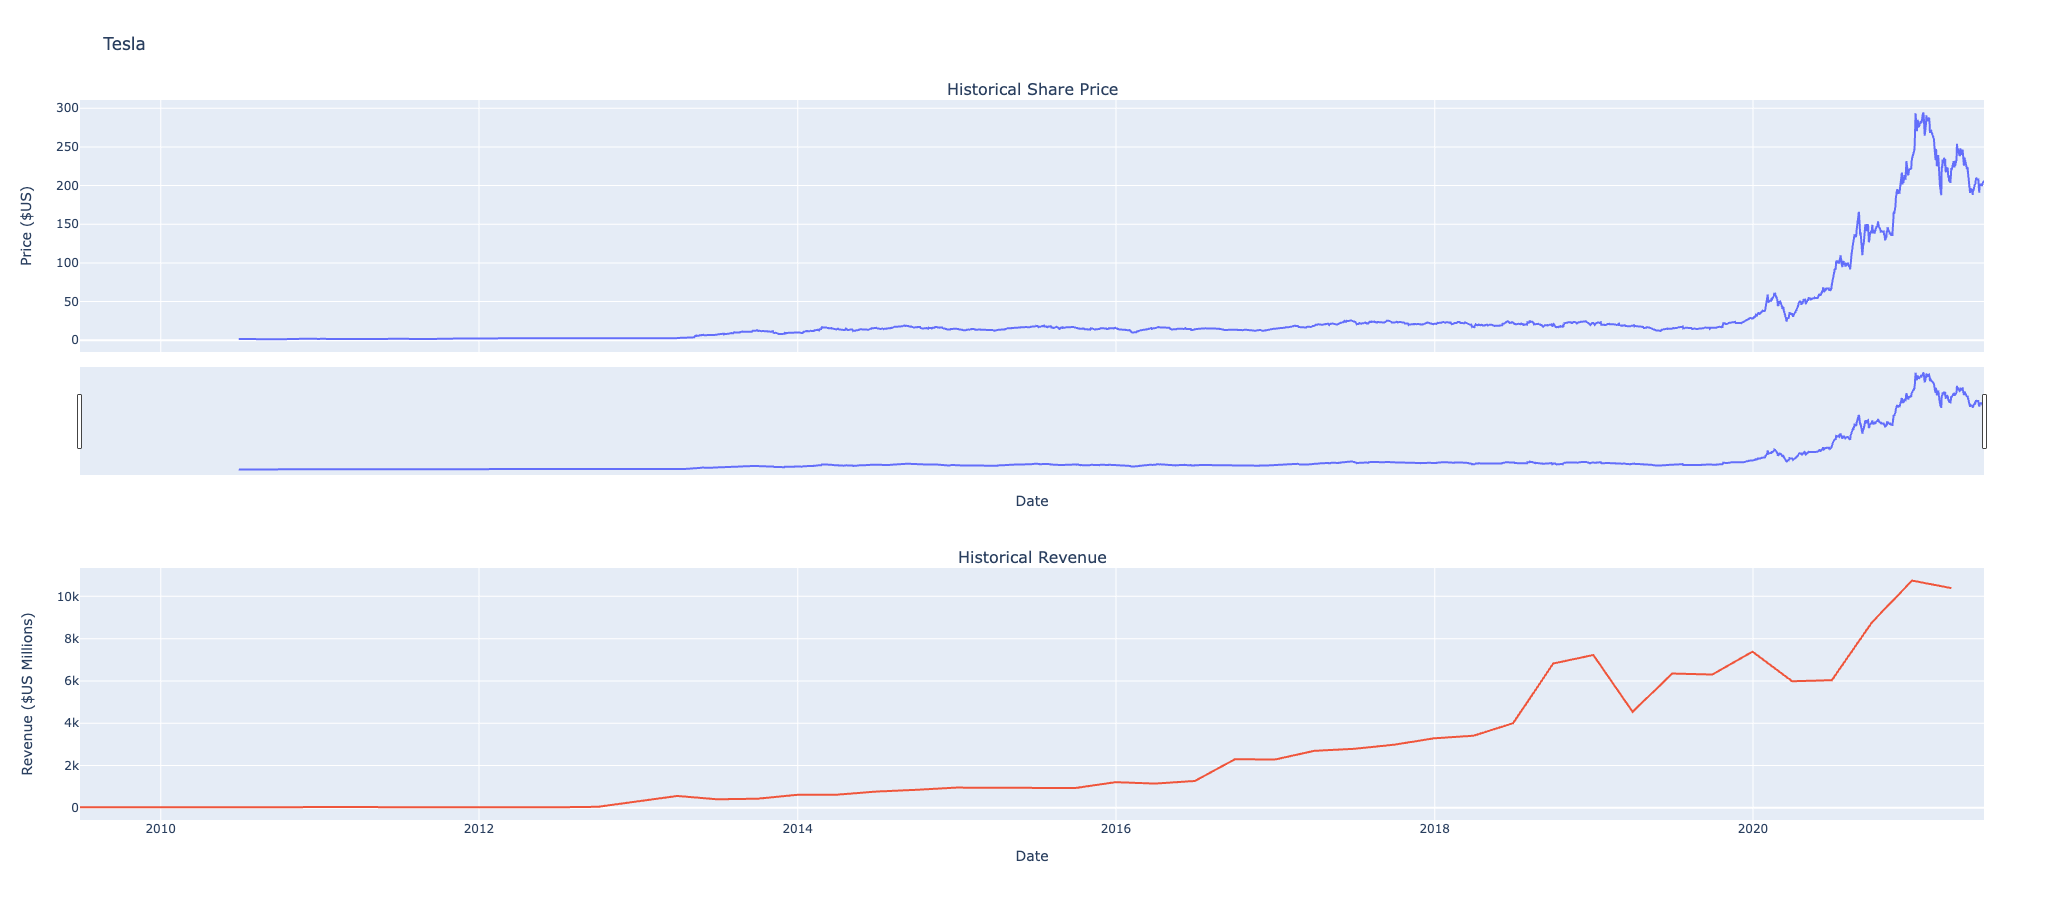

In [28]:
make_graph(tesla_stock_data, tesla_revenue_dataframe, "Tesla")

Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

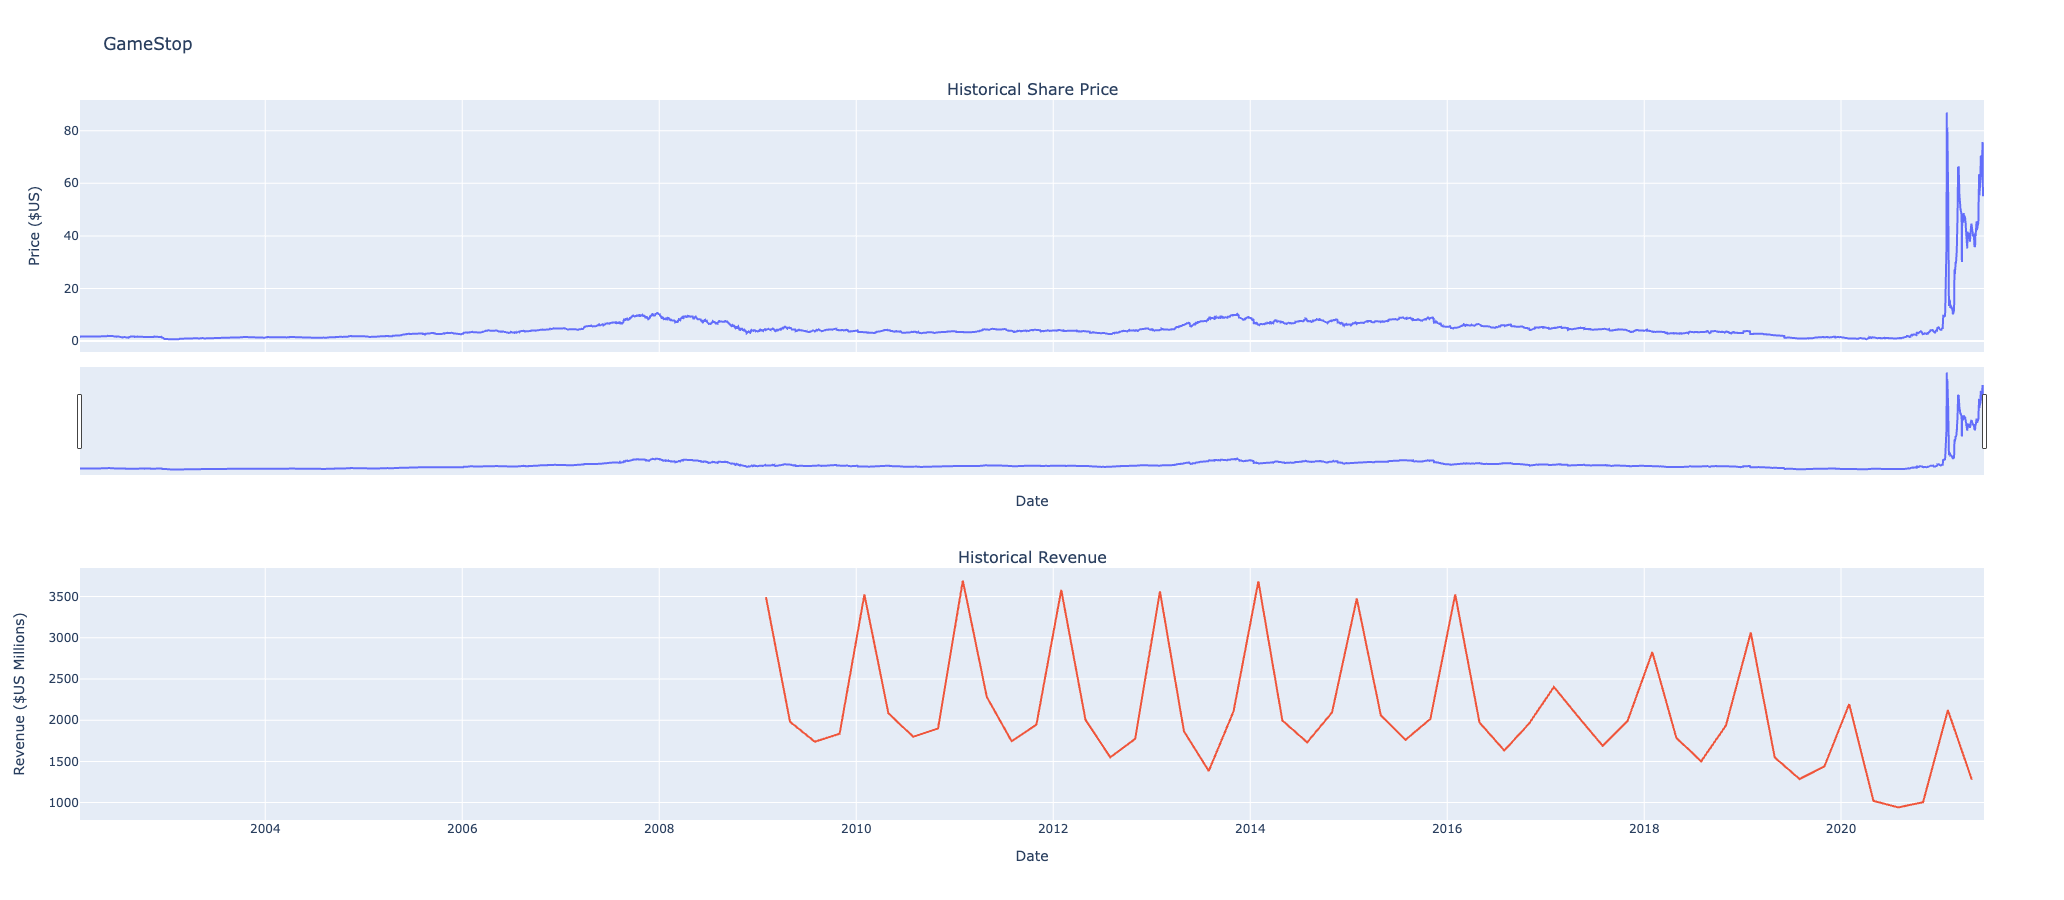

In [30]:
make_graph(gme_data, gma_revenue_dataframe, "GameStop")